In [1]:
import warnings
warnings.filterwarnings('ignore') # 実行に影響のない　warninig　を非表示にします. 非推奨.

# Chapter3: 機械学習 分類問題

## 3.1 回帰と分類

[Chapter02]()では回帰問題について扱った．

回帰問題は数値を予測するのに対して，分類問題ではデータのクラス（カテゴリ）を予測する．

つまり，ある入力ベクトル $\mathbf x$ を $K$ 個の離散クラス $C_k (k=1,\dots , K)$ に割り当てることが，分類問題の目的である．

ここで、$K=2$ のとき二値分類，$K>2$ のとき多値分類と呼ぶ．

本章では，二値分類として[ロジスティック回帰モデル](#3.2)および[SVM（Support Vector Machine）](#3.4)を，多値分類として[多クラスロジスティック回帰](#3.3)を取り上げる．

## 3.2 ロジスティック回帰モデル
<a id="3.2"></a>

ロジスティック回帰モデルは回帰モデルを分類問題に応用したモデルである．

そのため、基本的な考え方は線形回帰と同様であり，入力ベクトル $\mathbf x$ と重みベクトル $\mathbf w$ の線形和 $\mathbf w^{\mathrm T} \mathbf x + w_0$ を計算する．

ただし，ロジスティック回帰では，予測クラスの確率を計算するため，出力の範囲を $0$ 以上 $1$ 以下に制限する必要がある．

そのため，シグモイド関数を用いることで，出力を $0$ から $1$ の間に抑えることができる． 

- シグモイド関数
$$ \sigma(x) = \frac{1}{1 + \exp^{-x}} \tag{3.1}$$

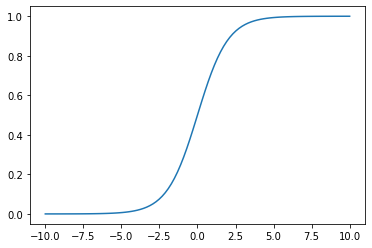

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

# シグモイド関数
def sigmoid(x):
    y = 1 / (1 + math.e**(-x))
    return y

x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

### 3.2.1 ロジスティック回帰の定式化

- データ集合：$\{\mathbf x_n, t_n\}$, $t_n \in \{0,1\}$

$n=1, \dots, N$ に対する尤度関数は以下のように書くことができる．

$$ p(\mathbf t | \mathbf w) = \prod_{n=1}^{N} y_n^{t_n} \{ 1-y_n \}^{1-t_n} \tag{3.2}$$

ここで, $ \mathbf t = (t_1, \dots, t_N)^{\mathrm T} $，$y_n = p(C_1|x_n)$ である．

ロジスティック回帰では，$p(C_1|x_n) >= 0.5$ であれば $t_n = C_1$，$p(C_1|x_n) < 0.5$ であれば $t_n = C_2$ となる．

尤度の負の対数をとると，以下の誤差関数を定義することができる．

この誤差関数は，公差エントロピー誤差関数と呼ばれる．

$$ E(\mathbf w) = -\ln p(\mathbf t | \mathbf w) = -\sum_{n=1}^{N} \{ t_n \ln y_n + (1-t_n) \ln (1-y_n) \}  \tag{3.3}$$

### 3.2.2 データセットの準備

今回は irisデータセット(「あやめ」という花の形状データ)を用いる

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# irisデータセットの読み込み
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['Species'])
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


iris データセットには，あやめの
- sepal length (がくの長さ)
- sepal width (がくの幅)
- petal length (花弁の長さ)
- petal width (花弁の幅)
- Species (品種：setosa、versicolor、virginica)

の情報がある．

今回は，petal length，petal width を用いて品種(setosa、versicolor)を分類するロジスティック回帰モデルを構築する．

ここで，Species=0 が setosa，Species=1 が versicolor である．

### 3.2.3 前処理

In [5]:
# 品種 setosa、versicolorを抽出
df = df[(df['Species']==0) | (df['Species']==1)]
# 説明変数
X = df.iloc[:, [2,3]]
# 目的変数
y = df.iloc[:, 4]
# 学習データと検証データを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### 3.2.4 モデル定義，学習

In [6]:
model = LogisticRegression()
# 学習
model.fit(X_train, y_train)

LogisticRegression()

### 3.2.5 学習結果の確認

In [7]:
from sklearn import metrics
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0


訓練データで学習した多クラスロジスティック回帰モデルを，テストデータで精度を評価すると，100%という結果を得ることができた．

以下で，データ点および決定境界を図示し，精度100％の分類が行えているか確認してみる．

In [8]:
# 切片
print(model.intercept_)
# 傾き
print(model.coef_)

[-7.3018626]
[[2.41092643 1.01214654]]


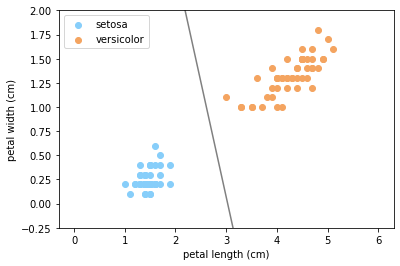

In [9]:
w_0 = model.intercept_
w_1 = model.coef_[0, 0]
w_2 = model.coef_[0, 1]

x1 = np.linspace(0, 6, 30)
x2 = (-w_1 * x1 - w_0) / w_2
# 決定境界およびデータ点を描画
plt.plot(x1, x2, color='gray')
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], color='lightskyblue', label=data.target_names[0])
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], color='sandybrown', label=data.target_names[1])
plt.ylim(-0.25, 2)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()
plt.show()

## 3.3 多クラスロジスティック回帰モデル
<a id="3.3"></a>

[3.2](#3.2)節では二値分類を行った．
本節では，先ほどと同様の iris データセットを用いて，多クラス分類をロジスティック回帰を用いて行う．

二値分類におけるロジスティック回帰モデルを，多クラスに応用する方法は以下の通りである．

1. [One VS Rest](#1.3.1)

2. [多項ロジスティック回帰](#1.3.2)

### 3.3.1 One VS Rest
<a id="3.3.1"></a>

この手法は，ロジスティック回帰に限らず，他の二値分類アルゴリズムを多値分類に応用する際に適用することができる．

二値分類のモデルを，クラス数定義し，それらの分類器のうち最も高い確率のクラスを予測結果とする．

例えば，犬・猫・虎を分類対称のクラスとすると，One VS Rest では，以下の3つの分類器を構築します．

1. 犬 vs その他（猫・虎）を分類する分類器
2. 猫 vs その他（犬・虎）を分類する分類器
3. 虎 vs その他（犬・猫）を分類する分類器

しかし，データ数や分類対称のクラス数が多い場合や，複雑な分類アルゴリズムの場合では，多大な学習コストを要することになる．

### 3.3.2 多項ロジスティック回帰
<a id="3.3.2"></a>

この手法は，二値分類用のロジスティック回帰を多値分類用に拡張したモデルである．

式(1.3)は二値分類用の損失関数であったので，これを工夫する必要があります．

二値分類では，目的変数を 0/1 のと変換してシグモイド関数を適用していましたが，多クラスの場合は同様にはできません．

そこで，1-of-K 符号化というものを用います．

- 1-of-K 符号化

$$
t_{nk} = 
\left\{
\begin{align*}
1,\,\,  \ & k_n=k \\
0,\,\,  \ & otherwise
\end{align*}
\right.
\tag{3.4}
$$

クラス $C_k$ に属する特徴ベクトルに対する目的変数ベクトル $t_n$ が $k$ 番目の要素が $1$ でそれ以外の要素がすべて $0$ となるような符号化法である

二値分類では式(3.1)のシグモイド関数を使用しましたが，多値分類ではソフトマックス関数を使用します．

- ソフトマックス関数
$$ 
p_k(x) = \frac{\exp^{x_k}}{\exp^{x_1} + \exp^{x_2} + \dots + \exp^{x_K}} = \frac{\exp^{x_k}}{\sum_{k=1}^{K}\exp^{x_i}}
\tag{3.5} $$

そして、このとき尤度関数は以下のように定義することができる．

$$
p(\mathbf T | \mathbf w_1, \dots, \mathbf w_K) = \prod_{n=1}^{N}\prod_{k=1}^{K} p(C_k | \mathbf x_n)^{t_{nk}} = \prod_{n=1}^{N}\prod_{k=1}^{K} y_{nk}^{t_nk}
\tag{1.6}
$$

先ほどと同様に，負の対数をとると以下の多値分類に対する公差エントロピー誤差関数を得ることができる

$$
E(\mathbf w_1, \dots, \mathbf w_K)) = -\ln p(\mathbf T | \mathbf w_1, \dots, \mathbf w_K) = -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{nk} \ln y_{nk}
\tag{1.7}
$$

### 3.3.3 データセットの準備

In [10]:
# irisデータセットの読み込み
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['Species'])
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### 3.3.4 前処理

今回は，sepal length，sepal width，petal length，petal width を用いて品種（setosa、versicolor，virginica）を分類するロジスティック回帰モデルを構築する．

In [12]:
# 学習データと検証データを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### 3.3.5 モデル定義，学習

In [13]:
model = LogisticRegression()
# 学習
model.fit(X_train, y_train)

LogisticRegression()

### 3.3.6 評価

In [14]:
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158


訓練データで学習した多クラスロジスティック回帰モデルを，テストデータで精度を評価すると，約97.4%という結果を得ることができた．

## 3.4 サポートベクターマシン（SVM：Support Vector Machine)
<a id="3.4"></a>

これまでロジスティック回帰について述べてきたが，ここでは分類問題のその他のアルゴリズムとして，SVM を紹介する．

SVM は，教師あり学習の二値分類モデルである．

ただし， SVM の回帰問題や多値分類問題への応用も存在する.

SVM は以下の識別境界で入力ベクトルを分離する．

$$ y(\mathbf x) = \mathbf w^{\mathrm T} \mathbf x + b 
\tag{1.8}$$

以下は，データ点と識別境界を図示したものであるが，どちらの識別境界が最適でしょうか？

どちらもクラスタを適切に分離していますが，右図が最適な識別境界である．

SVM ではサポートベクトルと識別境界の距離（マージン）を最大化するように，学習を行う．

<table><tr>
    <td><img src="figs/svm1.png" width="80%"></td>
    <td><img src="figs/svm1.png" width="80%"></td>
</tr></table>

ここでラベル変数を以下のように定義する

$$
t_i = 
\left\{
\begin{align*}
1,\,\,  \ & \mathbf w^{\mathrm T}x_i + b > 0 \\
-1,\,\,  \ & \mathbf w^{\mathrm T}x_i + b < 0
\end{align*}
\right.
\tag{1.9}
$$

さらに，すべてのデータ点は線形分離可能と仮定すると，以下の条件を満たす.

$$ t_n (\mathbf w^{\mathrm T}\mathbf x_n + b) > 0 
\tag{1.10}$$

したがって，識別境界から点 $\mathbf x_n$ までの距離は以下のように表すことができる．

$$
\frac{t_n(\mathbf w^{\mathrm T}\mathbf x_n + b)}{||\mathbf w||}
\tag{1.11}
$$

マージンは，訓練データと分類協会の最短距離であり，SVM は，そのマージンを最大化することが目的である．

つまり，以下の最適化問題を解くことで最適な識別境界を得ることができる．

$$
\underset{\mathbf w,\, b}{\mathrm{argmax}}
\left\{
\frac{1}{||\mathbf w||}
\underset{n}{\mathrm{min}}
[ t_n(\mathbf w^{\mathrm T} \mathbf x_n + b) ]
\right \}
\tag{1.12}
$$

### 3.4.1 データセットの準備

今回は， scikit-learn の make_blobs で訓練データを生成し，それを使用する．

- centers：クラスターの数
- n_samples：サンプル数
- n_features：特徴量の数
- cluster_std：クラスター分布の標準偏差

In [15]:
from sklearn.datasets import make_blobs 
X, y = make_blobs(centers=2, n_samples=1000, n_features=5, cluster_std=5, random_state=121)

In [16]:
# 学習データと検証データを分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3.4.2 前処理

In [17]:
# データを標準化するための準備
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

### 3.4.3 モデル定義，学習

In [18]:
# モデル定義
# transformで標準化を行い，学習
from sklearn.svm import SVC
clf = SVC(max_iter=100)
clf.fit(scaler.transform(X_train), y_train)

SVC(max_iter=100)

### 3.4.4 評価

In [19]:
# テストデータも標準化を実行し，predict(予測)を行う
y_pred = clf.predict(scaler.transform(X_test))

In [20]:
#正解率を算出
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.93

テストデータで学習済みSVMを評価すると，約93%という正解率を得ることができた．

## 3.5 フルスクラッチコーディング
<a id="3.5"></a>

これまでscikit-learnで実装された機械学習モデルを用いて分類問題を解いてきた．<br>
これらを通して，libraryの使用によってpythonでは簡単に機械学習モデルを扱うことができることが実感できたと思う．<br>
しかし，これらのモデルの実装内容や挙動については実装されたコードを見てみなければわかりにくい部分も多い．<br>
そこで，本節ではscikit-learnでどのように機械学習モデルが実装されているのかを理解するために，ロジスティック回帰をフルスクラッチで実装を行う．

### 3.5.1 ロジスティック回帰のパラメータ推定

ロジスティック回帰において損失関数は以下の通りである．

$$ E(\mathbf w) = -\ln p(\mathbf t | \mathbf w) = -\sum_{n=1}^{N} \{ t_n \ln y_n + (1-t_n) \ln (1-y_n) \}  \tag{1.3}$$

線形回帰の場合には損失関数から解析的にパラメータの推定を行うことが可能であった．<br>
しかし，ロジスティック回帰においてはシグモイド関数を利用した非線形な変換を行うため，解析的にパラメータの推定を行うことは困難である．<br>
そこで，今回の実装では最急降下法によるパラメータの推定を行うことにする．

### 3.5.2 最急降下法

最急降下法は機械学習において広く利用されている損失関数を最小にするパラメータの推定方法の一つである．<br>
別名山登り法とも呼ばれており，「山頂を目指して少しずつ移動していく」というのが直感的な理解である．（実際には谷を目指して山を下る挙動になる場合もあるが）

最急降下法の具体的なアルゴリズムについてみていこう．<br>
このアルゴリズムは損失関数$E(\mathbf{w})$が最小となるような方向（勾配）を計算し，その方向に少しづつパラメータを更新していくことで最適なパラメータにたどり着くことを目指すアルゴリズムである．

>1. $\mathbf{w}^{[0]}$に初期値を与える
>2. 以下の更新式に従ってパラメータ更新する．<br>
>$\mathbf{w}^{[t+1]} = \mathbf{w}^{[t]}- \eta\frac{\Delta E(\mathbf{w})}{\Delta \mathbf{w}}$
>3. (2)を繰り返し，パラメータの更新が止まれば($\frac{\Delta E(\mathbf{w})}{\Delta \mathbf{w}}<\epsilon$)終了する

- $\eta$は学習率と呼ばれており，パラメータの更新量の大きさを制御する
    - 小さいと収束までに時間が大きく必要になる
    - 大きいと学習が安定しない
- $\epsilon$は正の定数で，誤差の許容量を表す

では，試しに$f(x)=x^2$の最小値を求めるコードを作成してみよう．<br>
初期値やループ回数，学習率などを変化させて挙動の違いを確認してみるとよい．

<IPython.core.display.Javascript object>


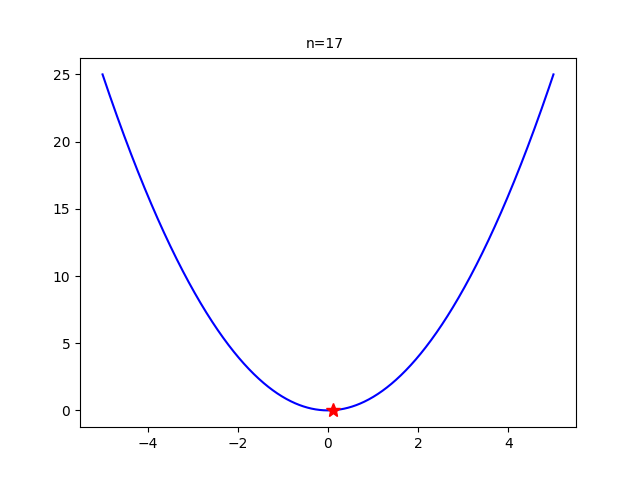

収束までの繰り返し回数: 21
極小値:x= 0.04611686018427388


[]

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

#x^2の関数
def f(x):
    return x**2
#x^2の1階微分
def diff_f(x):
    return 2*x

t=np.linspace(-5,5,1000)
fig, ax = plt.subplots()
ax.plot(t,f(t), color='blue') # グラフを作成
ims = []

x=5 #xの初期値
epsilon=0.01 #収束判定
eta=0.1 #学習率

i=0
while abs(diff_f(x)*eta)>epsilon:
    
    img = ax.plot(x,f(x),'*',markersize=10, color='red')
    img2=ax.text(-0.5, 27,f"n={i}")
    ims.append(img+[img2]) # グラフを配列に追加
    
    #ここに更新式を書く
    x=x-eta*diff_f(x)
    i+=1
print("収束までの繰り返し回数:",i)
print("極小値:x=",x)
ani = animation.ArtistAnimation(fig, ims, interval=100)
#ani.save('x^2.gif', writer='imagemagick')
plt.plot()

### 課題1 再急降下法の実装
上記のコードを参考に，$f(x)=x^4-20x^2+30x+20$についても最急降下法を試してみよう．

<IPython.core.display.Javascript object>


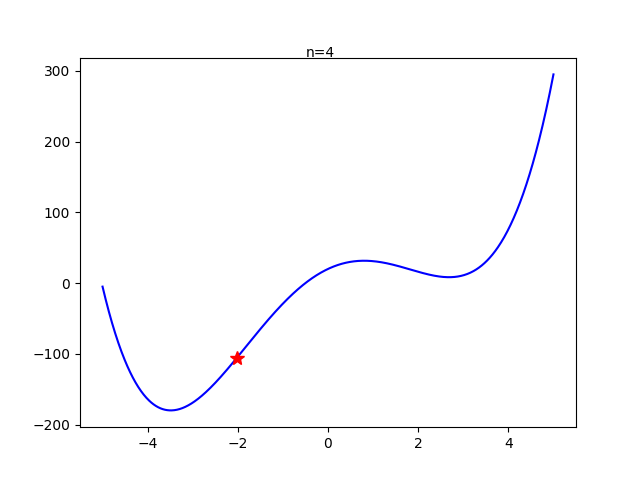

収束までの繰り返し回数: 7
極小値:x= -3.4857335615840714


In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

#x^2の関数
def f(x):
    return x**4-20*x**2+30*x+20

#x^2の1階微分
def diff_f(x):
    return 4*x**3-40*x+30

t=np.linspace(-5,5,1000)
fig, ax = plt.subplots()
ax.plot(t,f(t), color='blue') # グラフを作成
ims = []

x=0 #xの初期値
epsilon=0.001 #収束判定
eta=0.01 #学習率

i=0
while abs(diff_f(x)*eta)>epsilon:
    
    img = ax.plot(x,f(x),'*',markersize=10, color='red')
    img2=ax.text(-0.5, 320,f"n={i}")
    ims.append(img+[img2]) # グラフを配列に追加
    
    #ここに更新式を書く
    x=x-eta*diff_f(x)
    i+=1

print("収束までの繰り返し回数:",i)
print("極小値:x=",x)
ani = animation.ArtistAnimation(fig, ims, interval=100)
#ani.save('x^4.gif', writer='imagemagick')

先ほどのグラフと違い，複数の極小点が存在していることから，初期値によってどの極小点に収束するかが変わってしまう．<br>
そのため，勾配法を利用する場合には必ずしも最小値に到達していないことに注意しよう．（局所解の可能性あり）<br>
このような局所解に収束する問題を解決するための手法として焼きなまし法や遺伝アルゴリズム，タブーサーチなどが考案されており，余裕があれば調べてみるといいだろう．

## 3.5.3 ニュートン法

最急降下法を用いて計算を繰り返すことで，関数の極値を得られることが分かった．<br>
一階微分さえ得られていれば，単純な更新式で極値を求められるのは非常に優れた点である．<br>
一方で，収束速度や学習の安定性が学習率の設定に依存していることは問題であろう．<br>
そこで，学習率の設定を必要としない，かつ最急降下法よりも高速に極値を求める手法として，ニュートン法を紹介したいと思う．

ニュートン法は以下のようなアルゴリズムである．
>1. $\mathbf{w}^{[0]}$に初期値を与える
>2. 以下の更新式に従ってパラメータ更新する．<br>
>$\mathbf{w}^{[t+1]} = \mathbf{w}^{[t]}- \eta\frac{\Delta E(\mathbf{w})}{\Delta \mathbf{w}}$
>3. (2)を繰り返し，パラメータの更新が止まれば($\frac{\Delta E(\mathbf{w})}{\Delta \mathbf{w}}<\epsilon$)終了する

### 課題2 ニュートン法の実装
下記のコード埋めることでニュートン法を試してみよう．

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

#x^2の関数
def f(x):
    return x**2
#x^2の1階微分
def diff_f(x):
    return 2*x
#x^2の1階微分
def diff2_f(x):
    return 2

t=np.linspace(-5,5,1000)
fig, ax = plt.subplots()
ax.plot(t,f(t), color='blue') # グラフを作成
ims = []

x=5 #xの初期値
epsilon=0.001 #ループ回数
eta=0.1 #学習率

#最急降下法
i=0

#ニュートン法
x2=x
i2=0
while abs(diff_f(x)*eta)>epsilon or abs(diff_f(x2)/diff2_f(x2))>epsilon:
    
    img = ax.plot(x,f(x),'*',markersize=10, color='red')
    img2=ax.text(-0.5, 27,f"n={i}")
    img3 = ax.plot(x2,f(x2),'*',markersize=10, color='green')
    ims.append(img+[img2]+img3) # グラフを配列に追加
    
    #ここに更新式を書く
    if abs(diff_f(x)*eta)>epsilon:
        x=x-eta*diff_f(x)
        i+=1
    
    if abs(diff_f(x2)/diff2_f(x2))>epsilon:
        x2=x2-diff_f(x2)/diff2_f(x2)
        i2+=1
    
print("[最急降下法]")
print("収束までの繰り返し回数:",i)
print("極小値:x=",x)
print("[ニュートン法]")
print("収束までの繰り返し回数:",i2)
print("極小値:x=",x2)
ani = animation.ArtistAnimation(fig, ims, interval=100)
#ani.save('x^2.gif', writer='imagemagick')
plt.plot()

<IPython.core.display.Javascript object>

[最急降下法]
収束までの繰り返し回数: 31
極小値:x= 0.004951760157141522
[ニュートン法]
収束までの繰り返し回数: 1
極小値:x= 0.0


c:\Users\field-lab\anaconda3\envs\study\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


[]

あまりに収束が早過ぎるために止まっているように見えるかもしれないが，これがニュートン法を使う場合の大きなメリットになる．<br>
ただし，実用上は二階微分を必要とするという部分がネックとなり，勾配法の方が利用される場合もある．<br>
そのため，目的関数によって適切な最適化手法を選択する必要がある．

### 3.5.3 フルスクラッチの実装

今までの話を踏まえて，フルスクラッチでロジスティック回帰の実装を行ってみよう．<br>
コメント文に従ってコードの補間を行えばうまく動くはずである．

### 課題3 ロジスティック回帰の実装
#### 1 fit関数を完成させることで再急降下法を用いたパラメータ推定を行えるようにせよ．<br>
今回求めたいのは以下における$\mathbf w,w_0$の値である．<br>
$t_n=\sigma(\mathbf w^{\mathrm T} \mathbf x_n + w_0)$<br>
式の簡略化のために今回は$w_0$と$\mathbf w$を区別せずに，$\mathbf W$として$w_0$と$\mathbf w$を結合したものを考える．<br>
つまり，$\mathbf W=\{w_0,\mathbf w\}$といった形である．<br>
また，通常はm個の特徴量をx_nが持つとき，$\mathbf x_n=\{x_1,\cdots,x_m\}$となる．<br>
ここで，先頭に$1$を追加して$\mathbf x_n=\{1,x_1,\cdots,x_m\}$と定義しなおすこととする．<br>
これにより，以下のように簡単な形で$t_n$を表記できるようになる．<br>
$t_n=\sigma(\mathbf W^{\mathrm T} \mathbf x_n)$<br>
再急降下法におけるパラメータ更新式は以下のとおりである．(なぜこうなるのかは式変形を試してみよ)<br>
$\mathbf{W}^{[t+1]} = \mathbf{W}^{[t]}- \eta \mathbf X^{\mathrm T}(\mathbf y-\mathbf t)$<br>
**このとき，$\mathbf X=\{\mathbf x_n\},\mathbf y=\{y_n\},\mathbf t=\{t_n\}$である．**<br>
#### 2 **[オプション課題]** newton_fit関数を完成させることでニュートン法を用いたパラメータ推定を行えるようにせよ．<br>
ニュートン法におけるパラメータ更新式は以下のとおりである．(なぜこうなるのかは式変形を試してみよ)<br>
$\mathbf{W}^{[t+1]} = \mathbf{W}^{[t]}- H^{-1}\mathbf X^{\mathrm T}(\mathbf y-\mathbf t)$<br>
ここで$H$は以下のとおりである．<br>
$H=X^{T}\begin{pmatrix}
  t_1(1-t_1)                                                \\
         & t_2(1-t_2)           &        & \text{\huge{0}}   \\
         &                 & \ddots                     \\
         & \text{\huge{0}} &        & \ddots            \\
         &                 &        &           & t_n(1-t_n) 
\end{pmatrix}X$

In [9]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from copy import deepcopy
class MyLogisticRegression:
    """ロジスティック回帰実行クラス

    Attributes
    ----------
    eta : float
        学習率
    epoch : int
        エポック数
    random_state : int
        乱数シード
    is_trained : bool
        学習完了フラグ
    num_samples : int
        学習データのサンプル数
    num_features : int
        特徴量の数
    w : NDArray[float]
        パラメータベクトル
    costs : NDArray[float]
        各エポックでの損失関数の値の履歴
    W: list
        各エポックでのパラメータベクトルの履歴（グラフ描画用）

    Methods
    -------
    fit -> None
        学習データについてパラメータベクトルを適合させる
    predict -> NDArray[int]
        予測値を返却する
    """
    def __init__(self, eta=0.01, epsilon=0.05, random_state=42):
        self.eta = eta
        self.epsilon = epsilon
        self.random_state = random_state
        self.is_trained = False

    def fit(self, X, y):
        """
        学習データについてパラメータベクトルを適合させる

        Parameters
        ----------
        X : NDArray[NDArray[float]]
            学習データ: (num_samples, num_features)の行列
        y : NDArray[int]
            学習データの教師ラベル: (num_features, )のndarray
        """
        self.num_samples = X.shape[0]  # サンプル数
        self.num_features = X.shape[1]  # 特徴量の数
        
        # 乱数生成器
        rgen = np.random.RandomState(self.random_state)
        
        # 正規乱数を用いてパラメータベクトルを初期化
        self.w = rgen.normal(loc=0.0, scale=0.01, size=1+self.num_features)
        self.W = []  # 各エポックでのパラメータベクトルの値を格納する配列
        
        net_input = self._net_input(X)
        output = self._activation(net_input)
        self.costs = [(-y @ np.log(output)) - ((1-y) @ np.log(1-output))]  # 各エポックでの損失関数の値を格納する配列
        #xの先頭に1を追加する
        Xd=np.hstack((np.ones((self.num_samples,1)),X))
        # パラメータベクトルの更新
        while True:
            
            
            # 式(2)
            self.w+= self.eta * Xd.T @ (y - output)
            
            net_input = self._net_input(X)
            output = self._activation(net_input)
            
            # 損失関数: 式(1.3)
            cost = (-y @ np.log(output)) - ((1-y) @ np.log(1-output))

            if abs(self.costs[-1]-cost)<self.epsilon:
                break
                
            self.costs.append(cost)
            #本来は必要ないが，グラフの描画用
            self.W.append(deepcopy(self.w))
            
        # 学習完了のフラグを立てる
        self.is_trained = True
    
    #ニュートン法を用いたパラメータ推定
    def newton_fit(self, X, y):
        """
        学習データについてパラメータベクトルを適合させる

        Parameters
        ----------
        X : NDArray[NDArray[float]]
            学習データ: (num_samples, num_features)の行列
        y : NDArray[int]
            学習データの教師ラベル: (num_features, )のndarray
        """
        self.num_samples = X.shape[0]  # サンプル数
        self.num_features = X.shape[1]  # 特徴量の数
        
        # 乱数生成器
        rgen = np.random.RandomState(self.random_state)
        
        # 正規乱数を用いてパラメータベクトルを初期化
        self.w = rgen.normal(loc=0.0, scale=0.01, size=1+self.num_features)
        self.W = []  # 各エポックでのパラメータベクトルの値を格納する配列
        
        net_input = self._net_input(X)
        output = self._activation(net_input)
        self.costs = [(-y @ np.log(output)) - ((1-y) @ np.log(1-output))]  # 各エポックでの損失関数の値を格納する配列
        
        #xの先頭に1を追加する
        Xd=np.hstack((np.ones((self.num_samples,1)),X))
        # パラメータベクトルの更新
        while True:
            
            H = Xd.T@np.diag(output*(np.ones(len(output))-output))@Xd
            H_inv = np.linalg.inv(H)
            # 式(2)
            self.w += H_inv@ Xd.T @ (y - output)
            
            net_input = self._net_input(X)
            output = self._activation(net_input)
            
            # 損失関数: 式(1)
            cost = (-y @ np.log(output)) - ((1-y) @ np.log(1-output))

            if abs(self.costs[-1]-cost)<self.epsilon:
                break
                
            self.costs.append(cost)
            #本来は必要ないが，グラフの描画用
            self.W.append(deepcopy(self.w))
            
        # 学習完了のフラグを立てる
        self.is_trained = True
        
    def predict(self, X):
        """
        予測値を返却する

        Parameters
        ----------
        X : NDArray[NDArray[float]]
            予測するデータ: (any, num_features)の行列

        Returens
        -----------
        NDArray[int]
            0 or 1 (any, )のndarray
        """
        if not self.is_trained:
            raise Exception('This model is not trained.')
        return np.where(self._activation(self._net_input(X)) >= 0.5, 1, 0)

    def _net_input(self, X):
        """
        データとパラメータベクトルの内積を計算する

        Parameters
        --------------
        X : NDArray[NDArray[float]]
            データ: (any, num_features)の行列

        Returns
        -------
        NDArray[float]
            データとパラメータベクトルの内積の値
        """
        return X @ self.w[1:] + self.w[0]

    def _activation(self, z):
        """
        活性化関数（シグモイド関数）

        Parameters
        ----------
        z : NDArray[float]
            (any, )のndarray

        Returns
        -------
        NDArray[float]
            各成分に活性化関数を適応した (any, )のndarray
        """
        return 1 / (1 + np.exp(-z))

### 3.5.4 作成したモデルのテスト

実装したモデルが正しく動くかどうか実際に動かしてみよう．<br>
scikit-learnと同じような挙動が得られていれば実装成功である．<br>
(scikit-learn準拠でコーディングされている必要はない)

In [10]:
%matplotlib notebook
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['Species'])
df = pd.concat([X, y], axis=1)
# 品種 setosa、versicolorを抽出
df = df[(df['Species']==0) | (df['Species']==1)]
# 説明変数
X = df.iloc[:, [2,3]]
# 目的変数
y = df.iloc[:, 4]
# 学習データと検証データを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

まずは最急降下法である．

In [11]:
model = MyLogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0


In [12]:
fig, ax = plt.subplots()
ims = []
ax.set_ylim(-0.25, 2)
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], color='lightskyblue', label=data.target_names[0])
ax.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], color='sandybrown', label=data.target_names[1])
for n,w in enumerate(model.W):
    w_0,w_1,w_2 = w
    x1 = np.linspace(0, 6, 30)
    x2 = (-w_1 * x1 - w_0) / w_2
    # 決定境界およびデータ点を描画
    img = ax.plot(x1, x2, color='gray')
    img2=ax.text(2.5, 2.1,f"n={n}")
    ims.append(img+[img2])
print("収束までの繰り返し回数:",len(model.W))
ani = animation.ArtistAnimation(fig, ims, interval=100)
#ani.save('MyLogisticRegression.gif', writer='imagemagick')

<IPython.core.display.Javascript object>

収束までの繰り返し回数: 96


c:\Users\field-lab\anaconda3\envs\study\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


続いてニュートン法を利用した場合

In [13]:
model = MyLogisticRegression()
model.newton_fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0


In [14]:
fig, ax = plt.subplots()
ims = []
ax.set_ylim(-0.25, 2)
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], color='lightskyblue', label=data.target_names[0])
ax.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], color='sandybrown', label=data.target_names[1])
for n,w in enumerate(model.W):
    w_0,w_1,w_2 = w
    x1 = np.linspace(0, 6, 30)
    x2 = (-w_1 * x1 - w_0) / w_2
    # 決定境界およびデータ点を描画
    img = ax.plot(x1, x2, color='gray')
    img2=ax.text(2.5, 2.1,f"n={n}")
    ims.append(img+[img2])
print("収束までの繰り返し回数:",len(model.W))
ani = animation.ArtistAnimation(fig, ims, interval=500)
#ani.save('MyLogisticRegression.gif', writer='imagemagick')

<IPython.core.display.Javascript object>

収束までの繰り返し回数: 7


c:\Users\field-lab\anaconda3\envs\study\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
